<a href="https://colab.research.google.com/github/Danielstevends/AirTransport/blob/main/final_project_air_transportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Air Transportation Calculator

Input:
- Location of coordinates of Vertiports

Output:
- The distance
- The time to travel within the Vertiports
- Price per customers



In [ ]:
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
import matplotlib.pyplot as plt
import folium

from IPython.display import display
from ipywidgets import IntSlider, FloatSlider, VBox, interactive_output, Layout, Text, Button
from ipywidgets import Button, HTML, VBox, Text
from ipyleaflet import Map, Marker, Popup, FullScreenControl, MarkerCluster

In [ ]:
# Run this instead if we want to use sample coordinates for a, b, c
a = [-3.994521, -79.211542]
b = [-3.988506, -79.357739]
c = [-3.942725, -79.433652]

# Make a dictionary of the geographic coordinates
coordinates = {
    'a': (a[0], a[1]),  # Hospital in Loja, Ecuador
    'b': (b[0], b[1]),  # Catamayo in Ecuador
    'c': (c[0], c[1])   # San Pedro la Bendita
}

# Example inputs
# Hospital in Loja, Ecuador (-3.994521, -79.211542)
# Catamayo in Ecuador (-3.988506, -79.357739)
# San Pedro la Bendita (-3.942725, -79.433652)

No need to bellow code this if you want to use the above sample coordinates:

In [ ]:
# Function to parse input into coordinates
def get_coordinates(input_string):
    try:
        x, y = map(float, input_string.strip().split(','))
        return (x, y)
    except ValueError:
        print("Invalid input. Please enter two numeric values separated by a comma.")
        return None

# Collecting coordinates
print("Please enter the coordinates for points a, b, and c in the format 'x,y'.")
a = get_coordinates(input("Enter coordinates for point a: "))
b = get_coordinates(input("Enter coordinates for point b: "))
c = get_coordinates(input("Enter coordinates for point c: "))

# Ensure all points are valid before proceeding
if None in coordinates.values():
    print("Error: One or more entries are invalid.")
else:
    # Extracting x and y coordinates
    x_coords, y_coords = zip(*coordinates.values())
    labels = coordinates.keys()


# Example inputs
# Hospital in Loja, Ecuador (-3.994521, -79.211542)
# Catamayo in Ecuador (-3.988506, -79.357739)
# San Pedro la Bendita (-3.942725, -79.433652)

Please enter the coordinates for points a, b, and c in the format 'x,y'.
Enter coordinates for point a: -3.994521, -79.211542
Enter coordinates for point b: -3.988506, -79.357739
Enter coordinates for point c: -3.942725, -79.433652


In [ ]:
display(HTML('<strong style="font-size: 16px;">Finalize the Location of the Coordinates</strong>'))
display(HTML('Click "Capture Coordinates" to fixate'))


# Define initial marker positions
positions = [(a[0], a[1]), (b[0], b[1]), (c[0], c[1])]

# Create a map
m = Map(center=(a[0], a[1]), zoom=12)
m.add_control(FullScreenControl())

# Text widget for displaying coordinates
coordinates_display = Text(value='', description='Captured Coordinates:', disabled=False)

# Function to create and add a draggable marker to the map with a popup
def add_draggable_marker(lat, lon, label):
    marker = Marker(location=(lat, lon), draggable=True)
    # Create a Popup for this marker
    popup = Popup(location=(lat, lon), child=Text(value=label), close_button=False, auto_close=False)
    marker.popup = popup
    m.add_layer(marker)
    return marker

# Create markers with labels
labels = ['Point A', 'Point B', 'Point C']
markers = [add_draggable_marker(pos[0], pos[1], label) for pos, label in zip(positions, labels)]

# Button to capture coordinates
capture_button = Button(description="Capture Coordinates")

# Function to capture and parse coordinates on button click
def on_button_clicked(x):
    global a, b, c

    # Retrieve the coordinates of the markers
    a = markers[0].location
    b = markers[1].location
    c = markers[2].location

    # Update the text widget to display the coordinates
    coordinates_display.value = f"Point A: {a}, Point B: {b}, Point C: {c}"
    coordinates_display.layout = Layout(width='50%', height='20px', margin='10px 0 10px 0')

capture_button.on_click(on_button_clicked)

# Display the map and widgets
display(VBox([m, capture_button, coordinates_display]))

HTML(value='<strong style="font-size: 16px;">Finalize the Location of the Coordinates</strong>')

HTML(value='Click "Capture Coordinates" to fixate')

Python Dictionary: Stores the coordinates in a Python dictionary, which can be accessed as coordinates['A'], coordinates['B'], and coordinates['C'] respectively.

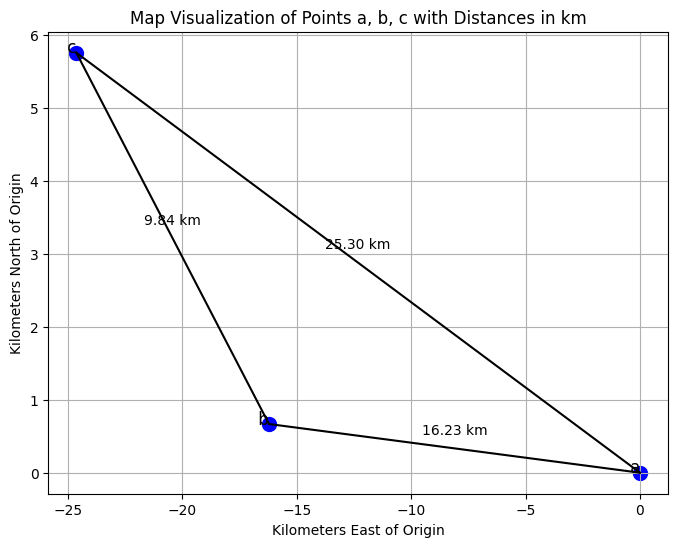

Distance between a and b: 16.23 km
Distance between b and c: 9.84 km
Distance between c and a: 25.30 km


In [ ]:
# Make a dictionary of the geographic coordinates
coordinates = {
    'a': (a[0], a[1]),  # Hospital in Loja, Ecuador
    'b': (b[0], b[1]),  # Catamayo in Ecuador
    'c': (c[0], c[1])   # San Pedro la Bendita
}

origin = coordinates['a']

# Function to convert geographic coordinates (lat, lon) to kilometers relative to an origin
def geo_to_km(origin, point):
    R = 6371.0  # Radius of the Earth in kilometers
    lat1, lon1 = origin
    lat2, lon2 = point

    delta_lat = math.radians(lat2 - lat1)
    delta_lon = math.radians(lon2 - lon1)
    a = (math.sin(delta_lat/2))**2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * (math.sin(delta_lon/2))**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c

    # Calculate the bearing angle
    x = math.sin(delta_lon) * math.cos(math.radians(lat2))
    y = math.cos(math.radians(lat1)) * math.sin(math.radians(lat2)) - math.sin(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.cos(delta_lon)
    bearing = math.atan2(x, y)

    # Convert bearing and distance to kilometers
    km_x = distance * math.sin(bearing)
    km_y = distance * math.cos(bearing)

    return km_x, km_y

# Calculate distances
def calculate_distance(point1, point2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Coordinates in decimal degrees
    lat1, lon1 = point1
    lat2, lon2 = point2

    # Convert decimal degrees to radians
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    # Haversine formula
    a = math.sin(delta_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in kilometers
    distance = R * c
    return distance

# Plotting setup
plt.figure(figsize=(8, 6))
origin = coordinates['a']
km_coordinates = {label: geo_to_km(origin, coord) if label != 'a' else (0, 0) for label, coord in coordinates.items()}
x_coords, y_coords = zip(*km_coordinates.values())
labels = km_coordinates.keys()

# Plot each point and annotate
for label, (x, y) in km_coordinates.items():
    plt.scatter(x, y, color='blue', s=100)  # Blue dots, size 100
    plt.text(x, y, f' {label}', fontsize=12, ha='right')

# Draw lines between points and annotate distances
pairs = [('a', 'b'), ('b', 'c'), ('c', 'a')]
for p1, p2 in pairs:
    x1, y1 = km_coordinates[p1]
    x2, y2 = km_coordinates[p2]
    plt.plot([x1, x2], [y1, y2], 'k-')  # black line between points

    # Calculate midpoint for placing the distance text
    mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
    # Calculate distance
    distance = calculate_distance(coordinates[p1], coordinates[p2])
    plt.annotate(f'{distance:.2f} km', xy=(mid_x, mid_y), textcoords="offset points", xytext=(0,10), ha='center')

# Set additional plot attributes
plt.grid(True)
plt.title('Map Visualization of Points a, b, c with Distances in km')
plt.xlabel('Kilometers East of Origin')
plt.ylabel('Kilometers North of Origin')
plt.show()


distance_ab = calculate_distance(coordinates['a'], coordinates['b'])
distance_bc = calculate_distance(coordinates['b'], coordinates['c'])
distance_ca = calculate_distance(coordinates['c'], coordinates['a'])

# Print results
print(f"Distance between a and b: {distance_ab:.2f} km")
print(f"Distance between b and c: {distance_bc:.2f} km")
print(f"Distance between c and a: {distance_ca:.2f} km")

Time to destination, x: Assuming, a,b, c are combined for total distance and
d is the speed.
Total fuel used, z: Assuming constant fuel efficiency, say g miles per gallon,
Price per person, y: operational cost per person

In [ ]:
# Initialize variables
a, b, c = distance_ab, distance_bc, distance_ca  # distances in miles
d = 60  # speed in mph
e = 3.5  # fuel price per gallon
f = 4   # number of persons
g = 30  # fuel efficiency in mpg

# Function to calculate outputs
def calculate(a, b, c, d, e, f):
    total_distance = a + b + c
    x = total_distance / d  # time to destination
    z = total_distance / g  # total fuel used
    y = (z * e) / f  # price per person
    return x, y, z

# Function to handle slider changes
def update_plot(a, b, c, d, e, f):
    x, y, z = calculate(a, b, c, d, e, f)
    print(f"")
    print(f"Based on the circumstances above")
    print(f"Time to destination (hours): {x:.2f}")
    print(f"Price per person: ${y:.2f}")
    print(f"Total fuel used (gallons): {z:.2f}")



# Custom layout to increase the left margin
slider_layout = Layout(width='500px', margin='10px 0px 0px 50px')  # Adjust the margin as needed

# Sliders with custom layout
a_slider = IntSlider(min=0, max=500, step=10, value=distance_ab, description='Distance A to B (km):', layout=slider_layout)
b_slider = IntSlider(min=0, max=500, step=10, value=distance_bc, description='Distance B to C (km):', layout=slider_layout)
c_slider = IntSlider(min=0, max=500, step=10, value=distance_ca, description='Distance C to A (km):', layout=slider_layout)
d_slider = IntSlider(min=0, max=120, step=5, value=60, description='Speed:', layout=slider_layout)
e_slider = FloatSlider(min=1.0, max=5.0, step=0.1, value=3.5, description='Fuel Price:', layout=slider_layout)
f_slider = IntSlider(min=1, max=10, step=1, value=4, description='No. of Persons:', layout=slider_layout)

display(HTML('<strong style="font-size: 16px;">Calculations based on the given circumstances and coordinates:</strong>'))
display(HTML('Play with the sliders (Speed, Fuel Price, and No. of Person) to see changes'))

# Widget interaction
ui = widgets.VBox([a_slider, b_slider, c_slider, d_slider, e_slider, f_slider])
out = widgets.interactive_output(update_plot, {'a': a_slider, 'b': b_slider, 'c': c_slider, 'd': d_slider, 'e': e_slider, 'f': f_slider})
display(ui, out)

HTML(value='<strong style="font-size: 16px;">Calculations based on the given circumstances and coordinates:</s…

HTML(value='Play with the sliders (Speed, Fuel Price, and No. of Person) to see changes')

Output()